# Face Generation

In this project, you'll define and train a DCGAN on a dataset of faces. Your goal is to get a generator network to generate *new* images of faces that look as realistic as possible!

The project will be broken down into a series of tasks from **loading in data to defining and training adversarial networks**. At the end of the notebook, you'll be able to visualize the results of your trained Generator to see how it performs; your generated samples should look like fairly realistic faces with small amounts of noise.

### Get the Data

You'll be using the [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) to train your adversarial networks.

This dataset is more complex than the number datasets (like MNIST or SVHN) you've been working with, and so, you should prepare to define deeper networks and train them for a longer time to get good results. It is suggested that you utilize a GPU for training.

### Pre-processed Data

Since the project's main focus is on building the GANs, we've done *some* of the pre-processing for you. Each of the CelebA images has been cropped to remove parts of the image that don't include a face, then resized down to 64x64x3 NumPy images. Some sample data is show below.

<img src='assets/processed_face_data.png' width=60% />

> If you are working locally, you can download this data [by clicking here](https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5be7eb6f_processed-celeba-small/processed-celeba-small.zip)

This is a zip file that you'll need to extract in the home directory of this notebook for further loading and processing. After extracting the data, you should be left with a directory of data `processed_celeba_small/`

In [1]:
# I used google colab for the environment
!wget 'https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5be7eb6f_processed-celeba-small/processed-celeba-small.zip'
!unzip processed-celeba-small.zip

Striimattava tuloste lyhennetty viimeiseen 5000 riviin.
  inflating: processed_celeba_small/celeba/New Folder With Items/052332.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052333.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052334.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052335.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052336.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052337.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052338.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052339.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052340.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052341.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052342.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052343.jpg  
  inflat

In [2]:
# this was the easiest method to upload the unit tests
# mounting on google drive makes disk reading slow for me
from google.colab import files
uploaded = files.upload()

Saving problem_unittests.py to problem_unittests.py


In [26]:
!nvidia-smi

Fri Dec 18 11:40:22 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    25W / 300W |      0MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
data_dir = 'processed_celeba_small/'

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
import problem_unittests as tests
#import helper
%matplotlib inline

## Visualize the CelebA Data

The [CelebA](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations. Since you're going to be generating faces, you won't need the annotations, you'll only need the images. Note that these are color images with [3 color channels (RGB)](https://en.wikipedia.org/wiki/Channel_(digital_image)#RGB_Images) each.

### Pre-process and Load the Data

Since the project's main focus is on building the GANs, we've done *some* of the pre-processing for you. Each of the CelebA images has been cropped to remove parts of the image that don't include a face, then resized down to 64x64x3 NumPy images. This *pre-processed* dataset is a smaller subset of the very large CelebA data.

> There are a few other steps that you'll need to **transform** this data and create a **DataLoader**.

#### Exercise: Complete the following `get_dataloader` function, such that it satisfies these requirements:

* Your images should be square, Tensor images of size `image_size x image_size` in the x and y dimension.
* Your function should return a DataLoader that shuffles and batches these Tensor images.

#### ImageFolder

To create a dataset given a directory of images, it's recommended that you use PyTorch's [ImageFolder](https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder) wrapper, with a root directory `processed_celeba_small/` and data transformation passed in.

In [4]:
# necessary imports
import torch
from torchvision import datasets
from torchvision import transforms

from torch.utils.data import DataLoader

In [5]:
def get_dataloader(batch_size, image_size, data_dir='processed_celeba_small/'):
    """
    Batch the neural network data using DataLoader
    :param batch_size: The size of each batch; the number of images in a batch  
    :param img_size: The square size of the image data (x, y)
    :param data_dir: Directory where image data is located
    :return: DataLoader with batched data
    """
    transform = transforms.Compose([
                        transforms.Resize(image_size),
                        transforms.ToTensor()
                            ])
    dataset = datasets.ImageFolder(data_dir, transform)
    dataloader = DataLoader(dataset, batch_size, shuffle=True)
    
    return dataloader


## Create a DataLoader

#### Exercise: Create a DataLoader `celeba_train_loader` with appropriate hyperparameters.

Call the above function and create a dataloader to view images. 
* You can decide on any reasonable `batch_size` parameter
* Your `image_size` **must be** `32`. Resizing the data to a smaller size will make for faster training, while still creating convincing images of faces!

In [7]:
# Define function hyperparameters
batch_size = 128
img_size = 32

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# Call your function and get a dataloader
celeba_train_loader = get_dataloader(batch_size, img_size)
print(len(celeba_train_loader.dataset))

89931


Next, you can view some images! You should seen square images of somewhat-centered faces.

Note: You'll need to convert the Tensor images into a NumPy type and transpose the dimensions to correctly display an image, suggested `imshow` code is below, but it may not be perfect.

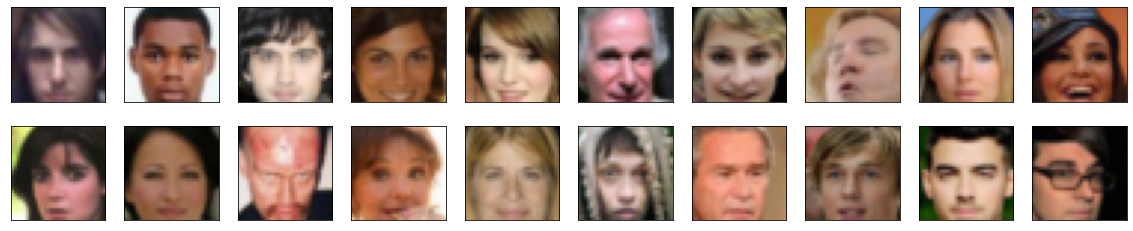

In [ ]:
# helper display function
def imshow(img):
    # you can do it with the tensor directly
    plt.imshow(img.permute((1, 2, 0)))

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# obtain one batch of training images
dataiter = iter(celeba_train_loader)
images, _ = dataiter.next() # _ for no labels

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(20, 4))
plot_size=20
for idx in np.arange(plot_size):
    ax = fig.add_subplot(2, plot_size/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])

#### Exercise: Pre-process your image data and scale it to a pixel range of -1 to 1

You need to do a bit of pre-processing; you know that the output of a `tanh` activated generator will contain pixel values in a range from -1 to 1, and so, we need to rescale our training images to a range of -1 to 1. (Right now, they are in a range from 0-1.)

In [ ]:
# TODO: Complete the scale function
def scale(x, feature_range=(-1, 1)):
    ''' Scale takes in an image x and returns that image, scaled
       with a feature_range of pixel values from -1 to 1. 
       This function assumes that the input x is already scaled from 0-1.'''
    # assume x is scaled to (0, 1)
    # scale to feature_range and return scaled x
    x = x * (feature_range[1] - feature_range[0]) + feature_range[0]
    return x


In [ ]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# check scaled range
# should be close to -1 to 1
img = images[0]
scaled_img = scale(img)

print('Min: ', scaled_img.min())
print('Max: ', scaled_img.max())

Min:  tensor(-0.8353)
Max:  tensor(0.8824)


---
# Define the Model

A GAN is comprised of two adversarial networks, a discriminator and a generator.

## Discriminator

Your first task will be to define the discriminator. This is a convolutional classifier like you've built before, only without any maxpooling layers. To deal with this complex data, it's suggested you use a deep network with **normalization**. You are also allowed to create any helper functions that may be useful.

#### Exercise: Complete the Discriminator class
* The inputs to the discriminator are 32x32x3 tensor images
* The output should be a single value that will indicate whether a given image is real or fake


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Discriminator(nn.Module):

    def __init__(self, conv_dim):
        """
        Initialize the Discriminator Module
        :param conv_dim: The depth of the first convolutional layer
        """
        super(Discriminator, self).__init__()
        
        # complete init function
        self.layers = nn.Sequential(
            
            nn.Conv2d(3, conv_dim, 4, 2, 1, bias = False),
            nn.BatchNorm2d(conv_dim),
            nn.LeakyReLU(0.2, True),

            nn.Conv2d(conv_dim, conv_dim * 2, 4, 2, 1, bias = False),
            nn.BatchNorm2d(conv_dim * 2),
            nn.LeakyReLU(0.2, True),

            nn.Conv2d(conv_dim * 2, conv_dim * 4, 4, 2, 1, bias = False),
            nn.BatchNorm2d(conv_dim * 4),
            nn.LeakyReLU(0.2, True),
            
            nn.Conv2d(conv_dim * 4, conv_dim * 8, 4, 2, 1, bias = False),
            nn.BatchNorm2d(conv_dim * 8),
            nn.LeakyReLU(0.2, True),

            nn.Conv2d(conv_dim * 8, 1, 2, 1, 0, bias = False),
            nn.Sigmoid()
        )

    def forward(self, x):
        """
        Forward propagation of the neural network
        :param x: The input to the neural network     
        :return: Discriminator logits; the output of the neural network
        """
        # define feedforward behavior
        x = self.layers(x)
        # reshape 4-dimensional output tensor to two dimensions
        x = x.view(-1, 1)
        return x


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(Discriminator)

Tests Passed


## Generator

The generator should upsample an input and generate a *new* image of the same size as our training data `32x32x3`. This should be mostly transpose convolutional layers with normalization applied to the outputs.

#### Exercise: Complete the Generator class
* The inputs to the generator are vectors of some length `z_size`
* The output should be a image of shape `32x32x3`

In [ ]:
class Generator(nn.Module):
    
    def __init__(self, z_size, conv_dim):
        """
        Initialize the Generator Module
        :param z_size: The length of the input latent vector, z
        :param conv_dim: The depth of the inputs to the *last* transpose convolutional layer
        """
        super(Generator, self).__init__()
        self.z_size = z_size
        # complete init function
        self.layers = nn.Sequential(
            
            nn.ConvTranspose2d(z_size, conv_dim * 8, 2, 1, 0, bias = False),
            nn.BatchNorm2d(conv_dim * 8),
            nn.ReLU(True),

            nn.ConvTranspose2d(conv_dim * 8, conv_dim * 4, 4, 2, 1, bias = False),
            nn.BatchNorm2d(conv_dim * 4),
            nn.ReLU(True),

            nn.ConvTranspose2d(conv_dim * 4, conv_dim * 2, 4, 2, 1, bias = False),
            nn.BatchNorm2d(conv_dim * 2),
            nn.ReLU(True),

            nn.ConvTranspose2d(conv_dim * 2, conv_dim, 4, 2, 1, bias = False),
            nn.BatchNorm2d(conv_dim),
            nn.ReLU(True),
            
            nn.ConvTranspose2d(conv_dim, 3, 4, 2, 1, bias = False),
            nn.Tanh()
        )
        

    def forward(self, x):
        """
        Forward propagation of the neural network
        :param x: The input to the neural network     
        :return: A 32x32x3 Tensor image as output
        """
        # reshape input noise to 4-dimensional tensor to feed into fractionally strided convolution
        x = x.view(-1, self.z_size, 1, 1)
        x = self.layers(x)
        return x

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(Generator)

Tests Passed


## Initialize the weights of your networks

To help your models converge, you should initialize the weights of the convolutional and linear layers in your model. From reading the [original DCGAN paper](https://arxiv.org/pdf/1511.06434.pdf), they say:
> All weights were initialized from a zero-centered Normal distribution with standard deviation 0.02.

So, your next task will be to define a weight initialization function that does just this!

You can refer back to the lesson on weight initialization or even consult existing model code, such as that from [the `networks.py` file in CycleGAN Github repository](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix/blob/master/models/networks.py) to help you complete this function.

#### Exercise: Complete the weight initialization function

* This should initialize only **convolutional** and **linear** layers
* Initialize the weights to a normal distribution, centered around 0, with a standard deviation of 0.02.
* The bias terms, if they exist, may be left alone or set to 0.

In [ ]:
def weights_init_normal(m):
    """
    Applies initial weights to certain layers in a model .
    The weights are taken from a normal distribution 
    with mean = 0, std dev = 0.02.
    :param m: A module or layer in a network    
    """
    # classname will be something like:
    # `Conv`, `BatchNorm2d`, `Linear`, etc.
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    # THE INSTRUCTIONS DO SAY TO INITIALIZE ONLY CONV LAYERS,
    # I ASSUME HERE THAT THIS WAS MEANT FOR THE 0-MEAN INIZITALIZATION
    # MOST SOURCES ALSO INITIALIZE BATCHNORM LAYERS BUT WITH MEAN 1 INSTEAD
    # SO I FOLLOW THAT CONVENTION
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)
    


## Build complete network

Define your models' hyperparameters and instantiate the discriminator and generator from the classes defined above. Make sure you've passed in the correct input arguments.

In [ ]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
def build_network(d_conv_dim, g_conv_dim, z_size):
    # define discriminator and generator
    D = Discriminator(d_conv_dim)
    G = Generator(z_size=z_size, conv_dim=g_conv_dim)

    # initialize model weights
    D.apply(weights_init_normal)
    G.apply(weights_init_normal)

    print(D)
    print()
    print(G)
    
    return D, G


#### Exercise: Define model hyperparameters

In [ ]:
# Define model hyperparams
d_conv_dim = 128
g_conv_dim = 128
z_size = 100

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
D, G = build_network(d_conv_dim, g_conv_dim, z_size)

Discriminator(
  (layers): Sequential(
    (0): Conv2d(3, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
    (3): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.2, inplace=True)
    (6): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): LeakyReLU(negative_slope=0.2, inplace=True)
    (9): Conv2d(512, 1024, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): LeakyReLU(negative_slope=0.2, inplace=True)
    (12): Conv2d(1024, 1, kerne

### Training on GPU

Check if you can train on GPU. Here, we'll set this as a boolean variable `train_on_gpu`. Later, you'll be responsible for making sure that 
>* Models,
* Model inputs, and
* Loss function arguments

Are moved to GPU, where appropriate.

In [ ]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import torch

# Check for a GPU
train_on_gpu = torch.cuda.is_available()
if not train_on_gpu:
    print('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Training on GPU!')

Training on GPU!


---
## Discriminator and Generator Losses

Now we need to calculate the losses for both types of adversarial networks.

### Discriminator Losses

> * For the discriminator, the total loss is the sum of the losses for real and fake images, `d_loss = d_real_loss + d_fake_loss`. 
* Remember that we want the discriminator to output 1 for real images and 0 for fake images, so we need to set up the losses to reflect that.


### Generator Loss

The generator loss will look similar only with flipped labels. The generator's goal is to get the discriminator to *think* its generated images are *real*.

#### Exercise: Complete real and fake loss functions

**You may choose to use either cross entropy or a least squares error loss to complete the following `real_loss` and `fake_loss` functions.**

In [ ]:
def real_loss(D_out):
    '''Calculates how close discriminator outputs are to being real.
       param, D_out: discriminator logits
       return: real loss'''
    loss = nn.BCELoss()(D_out, torch.ones_like(D_out))
    
    return loss

def fake_loss(D_out):
    '''Calculates how close discriminator outputs are to being fake.
       param, D_out: discriminator logits
       return: fake loss'''
    loss = nn.BCELoss()(D_out, torch.zeros_like(D_out))
    return loss

## Optimizers

#### Exercise: Define optimizers for your Discriminator (D) and Generator (G)

Define optimizers for your models with appropriate hyperparameters.

In [ ]:
import torch.optim as optim

# Create optimizers for the discriminator D and generator G
d_optimizer = optim.Adam(D.parameters(), lr=2e-4, betas=(0.5, .999))
g_optimizer = optim.Adam(G.parameters(), lr=2e-4, betas=(0.5, .999))

---
## Training

Training will involve alternating between training the discriminator and the generator. You'll use your functions `real_loss` and `fake_loss` to help you calculate the discriminator losses.

* You should train the discriminator by alternating on real and fake images
* Then the generator, which tries to trick the discriminator and should have an opposing loss function


#### Saving Samples

You've been given some code to print out some loss statistics and save some generated "fake" samples.

#### Exercise: Complete the training function

Keep in mind that, if you've moved your models to GPU, you'll also have to move any model inputs to GPU.

In [ ]:
def train(D, G, n_epochs, print_every=50):
    '''Trains adversarial networks for some number of epochs
       param, D: the discriminator network
       param, G: the generator network
       param, n_epochs: number of epochs to train for
       param, print_every: when to print and record the models' losses
       return: D and G losses'''
    
    # move models to GPU
    if train_on_gpu:
        D.cuda()
        G.cuda()

    # keep track of loss and generated, "fake" samples
    samples = []
    losses = []
    
    # Get some fixed data for sampling. These are images that are held
    # constant throughout training, and allow us to inspect the model's performance
    sample_size=16
    # NOTE THAT, BECAUSE I USE NORMAL DISTRIBUTED NOISE IN THE TRAINING LOOP,
    # I CHANGED THIS ONE TO NORMAL ALSO TO ENSURE A REFLECTIVE PICTURE OF THE TRAINING
    # PROGRESS
    fixed_z = np.random.normal(size=(sample_size, z_size))
    fixed_z = torch.from_numpy(fixed_z).float()
    # move z to GPU if available
    if train_on_gpu:
        fixed_z = fixed_z.cuda()

    # epoch training loop
    for epoch in range(n_epochs):

        # batch training loop
        for batch_i, (real_images, _) in enumerate(celeba_train_loader):

            batch_size = real_images.size(0)
            real_images = scale(real_images).to('cuda')

            # ===============================================
            #         YOUR CODE HERE: TRAIN THE NETWORKS
            # ===============================================
            
            D.zero_grad()

            output = D(real_images).view(-1)
            d_real_loss = real_loss(output)
            d_real_loss.backward()

            # train with fake
            noise = torch.randn(batch_size, z_size, 1, 1, device='cuda')
            fake = G(noise)
            output = D(fake.detach()).view(-1)
            d_fake_loss = fake_loss(output)
            d_fake_loss.backward()
            d_loss = d_fake_loss + d_real_loss
            d_optimizer.step()

            G.zero_grad()
            output = D(fake).view(-1)
            g_loss = real_loss(output)
            g_loss.backward()
            g_optimizer.step()
            
            # ===============================================
            #              END OF YOUR CODE
            # ===============================================

            # Print some loss stats
            if batch_i % print_every == 0:
                # append discriminator loss and generator loss
                losses.append((d_loss.item(), g_loss.item()))
                # print discriminator and generator loss
                print('Epoch [{:5d}/{:5d}] | d_loss: {:6.4f} | g_loss: {:6.4f}'.format(
                        epoch+1, n_epochs, d_loss.item(), g_loss.item()))


        ## AFTER EACH EPOCH##    
        # this code assumes your generator is named G, feel free to change the name
        # generate and save sample, fake images
        G.eval() # for generating samples
        samples_z = G(fixed_z)
        samples.append(samples_z)
        
        G.train() # back to training mode

    # Save training generator samples
    with open('train_samples.pkl', 'wb') as f:
        pkl.dump(samples, f)
    
    # finally return losses
    return losses

Set your number of training epochs and train your GAN!

In [ ]:
# set number of epochs 
n_epochs = 100


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# call training function
losses = train(D, G, n_epochs=n_epochs)

Epoch [    1/  100] | d_loss: 1.3557 | g_loss: 5.6375
Epoch [    1/  100] | d_loss: 0.7546 | g_loss: 16.9218
Epoch [    1/  100] | d_loss: 0.1321 | g_loss: 5.9415
Epoch [    1/  100] | d_loss: 0.4950 | g_loss: 4.3766
Epoch [    1/  100] | d_loss: 0.4893 | g_loss: 4.6142
Epoch [    1/  100] | d_loss: 0.6207 | g_loss: 3.1981
Epoch [    1/  100] | d_loss: 0.4215 | g_loss: 1.8695
Epoch [    1/  100] | d_loss: 0.2164 | g_loss: 3.7039
Epoch [    1/  100] | d_loss: 0.6284 | g_loss: 2.4802
Epoch [    1/  100] | d_loss: 0.5093 | g_loss: 2.5664
Epoch [    1/  100] | d_loss: 0.5539 | g_loss: 4.7248
Epoch [    1/  100] | d_loss: 0.6483 | g_loss: 4.1956
Epoch [    1/  100] | d_loss: 0.7028 | g_loss: 4.7232
Epoch [    1/  100] | d_loss: 0.6049 | g_loss: 4.1535
Epoch [    1/  100] | d_loss: 0.9581 | g_loss: 6.7728
Epoch [    2/  100] | d_loss: 1.7442 | g_loss: 4.5885
Epoch [    2/  100] | d_loss: 1.0886 | g_loss: 6.5406
Epoch [    2/  100] | d_loss: 0.6535 | g_loss: 3.4406
Epoch [    2/  100] | d_los

## Training loss

Plot the training losses for the generator and discriminator, recorded after each epoch.

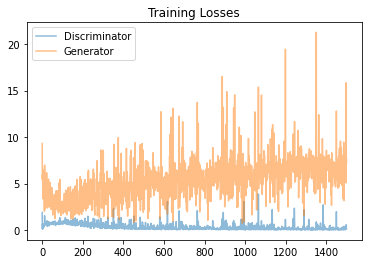

In [ ]:
fig, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label='Discriminator', alpha=0.5)
plt.plot(losses.T[1], label='Generator', alpha=0.5)
plt.title("Training Losses")
plt.legend()

## Generator samples from training

View samples of images from the generator, and answer a question about the strengths and weaknesses of your trained models.

In [ ]:
# helper function for viewing a list of passed in sample images
def view_samples(epochs, samples):
    fig, axes = plt.subplots(figsize=(16,len(epochs)*4), nrows=16, ncols=len(epochs), sharey=True, sharex=True)
    for i, epoch in enumerate(epochs):
      for ax, img in zip(axes[:,i], samples[epoch]):
          img = img.detach().cpu().numpy()
          img = np.transpose(img, (1, 2, 0))
          img = ((img + 1)*255 / (2)).astype(np.uint8)
          ax.xaxis.set_visible(False)
          ax.yaxis.set_visible(False)
          im = ax.imshow(img.reshape((32,32,3)))
          ax.set_xlabel(epoch)
    fig.tight_layout()
      

In [ ]:
# Load samples from generator, taken while training
with open('train_samples.pkl', 'rb') as f:
    samples = pkl.load(f)

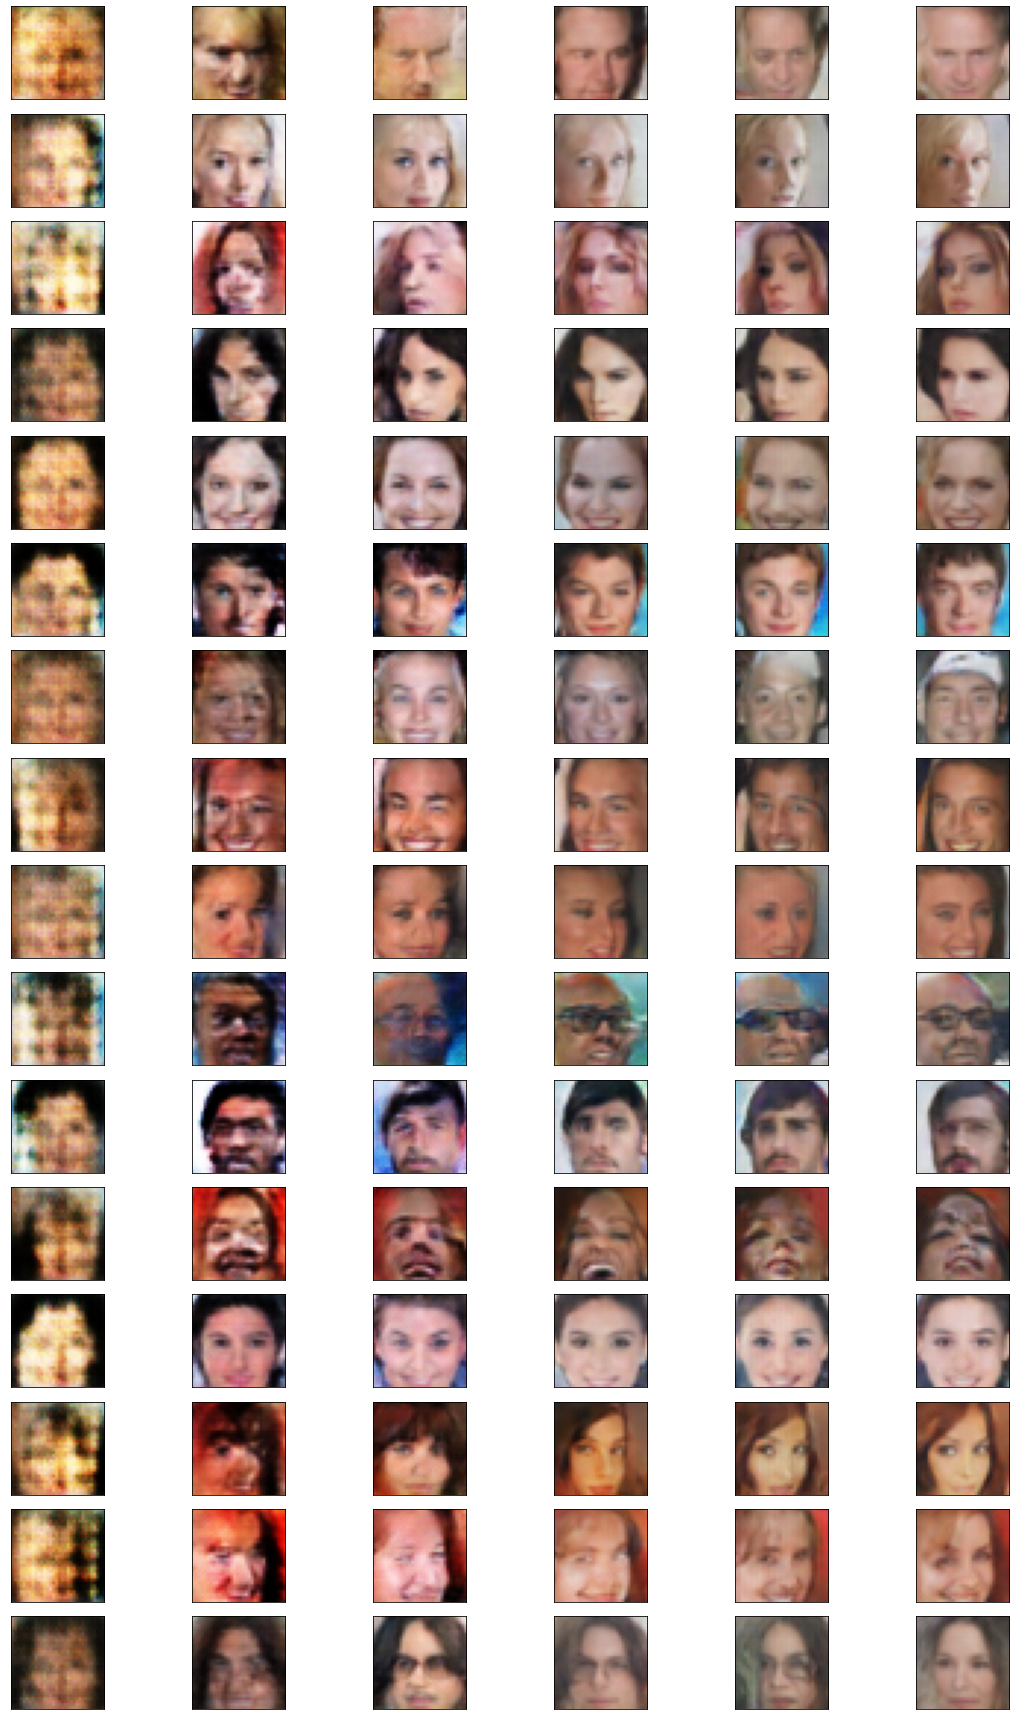

In [ ]:
# view samples across epochs
_ = view_samples([0, 4, 9, 19, 49, -1], samples)

### Question: What do you notice about your generated samples and how might you improve this model?
When you answer this question, consider the following factors:
* The dataset is biased; it is made of "celebrity" faces that are mostly white
* Model size; larger models have the opportunity to learn more features in a data feature space
* Optimization strategy; optimizers and number of epochs affect your final result


Through most training runs, images are in general quite realistic. (The images above from the last model run before submission is not the best. For an evaluation of the image quality, I would direct you to the images shown below with the experiment steps, or the report paper rather than the ones above). There are some probelm areas like hair, eyes and especially accessories like glasses and hats are not realistic. When zoomed in, they appear a bit more blurry, although the original data also contains blurry images. The generated images are biased toward caucasian faces. This is expected behavior, due to the racially biased data. I explored some more shallow models as well with worse results. Further extending model depth with added convolution/transposed convolution layers, could likely result in minor improvements, but increase training times dramatically; this architecture seems like a good tradeoff. 

In terms of epochs, the model seems to not improve that much after around 20 epochs, across all the runs I did. A lower number of epochs would likely be sufficient, but I stuck with 100 for consistency. I found that in training, the loss function of the generator tends to get quite noisy, suggesting that the generator has difficulties converging. This is not to say that the generator does not produce better images as we continue training, but rather that the discriminator improves faster than the generator. Lesser learning rates or momentum could alleviate issues, but also slow down training. Furthermore, exploring some alternatives to the architecture could resolve the issue. The state-of-the-art progresses fast in the quickly expanding GAN literature. Both alternatives are of course costly, due to the training taking quite long, and the fact that it is difficult to evaluate performance for a generative model, especially early on in training. And, as the main objective is to generate realistic images, which is a bit vague, I would deem these results satisfactory.

### Experiments on the model
I conduct the experiments in the same Jupyter notebook, because this works well with training in Colab. The experiments are run below.

In [ ]:
## FID and Inception scores

import torch
from torch import nn
from torch.autograd import Variable
from torch.nn import functional as F
import torch.utils.data

from torchvision.models.inception import inception_v3

import numpy as np
from scipy.stats import entropy
from scipy.linalg import sqrtm


def calculate_fid(act1, act2):
  """
  FID score computation adapted from 
  https://machinelearningmastery.com/how-to-implement-the-frechet-inception-distance-fid-from-scratch/

  """
	# calculate mean and covariance statistics
  mu1, sigma1 = act1.mean(axis=0), np.cov(act1, rowvar=False)
  mu2, sigma2 = act2.mean(axis=0), np.cov(act2, rowvar=False)
	# calculate sum squared difference between means
  ssdiff = np.sum((mu1 - mu2)**2.0)
	# calculate sqrt of product between cov
  covmean = sqrtm(sigma1.dot(sigma2))
	# check and correct imaginary numbers from sqrt
  if np.iscomplexobj(covmean):
    covmean = covmean.real
	# calculate score
  fid = ssdiff + np.trace(sigma1 + sigma2 - 2.0 * covmean)
  return fid

def inception_scores_fid(G, cuda=True, batch_size=batch_size, splits=10):
    """
    Generates a set of 5120 images given generator G and computes the inception
    score of the generated images and frechet inception distance between original
    and generated images. In addition, returns the set of latent z vectors for the top
    1% of the 5120 generated images based on the inception scores.
    
    Inception score computation adapted from
    https://github.com/sbarratt/inception-score-pytorch

    """

    N = 5120
    # Load inception model
    inception_model = inception_v3(pretrained=True, transform_input=False).cuda()
    inception_model2 = inception_v3(pretrained=True, transform_input=False).cuda()
    inception_model2.fc = nn.Identity().cuda()
    inception_model.eval()
    inception_model2.eval()

    up = nn.Upsample(size=(299, 299), mode='bilinear')
    def get_pred(x):
        x = up(x)
        x = inception_model(x)
        return F.softmax(x).data.cpu().numpy()
    def get_activations(x):
        x = up(x)
        x = inception_model2(x)
        return x.data.cpu().numpy()
    # Get predictions
    preds = np.zeros((N, 1000))
    r_activations = np.zeros((N, 2048))
    f_activations = np.zeros((N, 2048))
    dataiter = iter(celeba_train_loader)
    noises = []
    for i in range(N // batch_size):
        noise = torch.randn(batch_size, z_size, 1, 1, device='cuda')
        noises.append(noise)
        fake = G(noise)
        preds[i*batch_size:(i+1)*batch_size] = get_pred(fake)
        f_activations[i*batch_size:(i+1)*batch_size] = get_activations(fake)
        real, _ = dataiter.next() 
        r_activations[i*batch_size:(i+1)*batch_size] = get_activations(scale(real).cuda())

    noises = torch.cat(noises)
    # Now compute the mean kl-div
    split_scores = []
    ind_scores = []
    for k in range(splits):
        part = preds[k * (N // splits): (k+1) * (N // splits), :]
        py = np.mean(part, axis=0)
        scores = []
        for i in range(part.shape[0]):
            pyx = part[i, :]
            scores.append(entropy(pyx, py))
        split_scores.append(np.exp(np.mean(scores)))
        ind_scores.append(np.exp(scores))
    ind_scores = np.concatenate(ind_scores)
    noises = noises.cpu().numpy()[np.argsort(ind_scores)[-50:]]
    fid = calculate_fid(f_activations, r_activations)
    return np.mean(split_scores), fid, noises


inc_score, fid_score, noises = inception_scores_fid(G, cuda=True, batch_size=batch_size, splits=10)

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-1a9a5a14.pth


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3063: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
print('Inception score:', inc_score, 'Frechet Inception Distance:', fid_score)

Inception score: 2.0766999345239676 Frechet Inception Distance: 9.458978684833037


We next execute a turing-test like test, where we generate 50 random images and draw another 50 from the training data. Images are shuffled and given one at a time, and the accuracy of the human evaluator is tracked.

In [ ]:
# obtain one batch of training images
test_loader = get_dataloader(50, img_size)
dataiter = iter(test_loader)
images, _ = dataiter.next() # _ for no labels
noise = torch.randn(50, z_size, 1, 1, device='cuda')
fake = G(noise).detach().cpu()
fake = (fake + 1) / 2
images = torch.cat([images, fake])


randperm = np.random.permutation(100)
labels = np.where((randperm < 50), 'Real','Fake')
preds = []

from IPython.display import display
import ipywidgets as widgets
import matplotlib.pyplot as plt

button_real = widgets.Button(description='Real')
button_fake = widgets.Button(description='Fake')
#for iteration
button_fake.i = 0
button_real.i = 0

def f(i):
    plt.figure(figsize=(1, 1))
    x = images[i-1].permute((1,2,0))
    plt.imshow(x)
    plt.show()

output = widgets.Output()
with output:
  f(0)
  print(f'Image {button_real.i+1} of 100')

def on_click(b):
    button_real.i += 1
    button_fake.i += 1
    output.clear_output()
    if b.i > 99:
      print('No more images')
      print(f'Accuracy: {np.sum(labels[:len(preds)] == preds)}')
      return
    preds.append(b.description)
    with output:
      f(randperm[b.i])
      print(f'Image {b.i+1} of 100')
      print(f'Accuracy: {np.sum(labels[:len(preds)] == preds)} / {b.i}')

button_real.on_click(on_click)
button_fake.on_click(on_click)

display(button_real, button_fake, output)

Button(description='Real', style=ButtonStyle())

Button(description='Fake', style=ButtonStyle())

Output()

No more images
Accuracy: 69


Next, we repeat the exercise above, with the top 1% of generated images based on their inception scores.

In [ ]:
# obtain one batch of training images
test_loader = get_dataloader(50, img_size)
dataiter = iter(test_loader)
images, _ = dataiter.next() # _ for no labels
noise = torch.from_numpy(noises).cuda()
fake = G(noise).detach().cpu()
fake = (fake + 1) / 2
images = torch.cat([images, fake])


randperm = np.random.permutation(100)
labels = np.where((randperm < 50), 'Real','Fake')
preds = []


button_real = widgets.Button(description='Real')
button_fake = widgets.Button(description='Fake')
#for iteration
button_fake.i = 0
button_real.i = 0

def f(i):
    plt.figure(figsize=(1, 1))
    x = images[i-1].permute((1,2,0))
    plt.imshow(x)
    plt.show()

output = widgets.Output()
with output:
  f(0)
  print(f'Image {button_real.i+1} of 100')

def on_click(b):
    button_real.i += 1
    button_fake.i += 1
    output.clear_output()
    if b.i > 99:
      print('No more images')
      print(f'Accuracy: {np.sum(labels[:len(preds)] == preds)} / 100')
      return
    preds.append(b.description)
    with output:
      f(randperm[b.i])
      print(f'Image {b.i+1} of 100')
      print(f'Accuracy: {np.sum(labels[:len(preds)] == preds)} / {b.i}')

button_real.on_click(on_click)
button_fake.on_click(on_click)

display(button_real, button_fake, output)

Button(description='Real', style=ButtonStyle())

Button(description='Fake', style=ButtonStyle())

Output()

No more images
Accuracy: 73 / 100
No more images
Accuracy: 73 / 100
No more images
Accuracy: 73 / 100
No more images
Accuracy: 73 / 100
No more images
Accuracy: 73 / 100
No more images
Accuracy: 73 / 100


Finally, we explore the latent space with linear interpolation and vector arithmetic.

In [ ]:

def plot_interpoints(z1, z2, steps=5):
  '''
  Given two noise vectors z1, z2 and the amount of steps, creates a linear interpolation
  path with the given amount of steps and plot the images along the path
  in latent space.
  '''
  weights = torch.linspace(0, 1, steps)
  vecs = []
  for weight in weights:
    v = (1.0 - weight) * z1 + weight * z2
    vecs.append(v)
  vecs = torch.cat(vecs)
  fake = G(vecs).detach().cpu()
  fake = (fake + 1) / 2
  fig, axes = plt.subplots(figsize=(steps, 2), nrows=1, ncols=steps, sharey=True, sharex=True)
  for i in range(len(fake)): 
    axes[i].xaxis.set_visible(False)
    axes[i].yaxis.set_visible(False)
    im = axes[i].imshow(fake[i].permute(1,2,0))
  fig.tight_layout()

def plot_diffs(noise, first_ind, second_ind, third_ind):
  '''
  Models the vector arithmetic operations presented in the original DCGAN paper.
  
  Given a set of noise data and three sets of indices of length 4, creates
  a fourth set of vectors equal to
  noises[first_ind] - mean(noises[second_ind]) + mean(noises[third_ind])
  Then generates images using all four sets of noise vectors
  and plots all four sets of images in the same figure.
  
  '''
  first = noise[first_ind]
  second = noise[second_ind]
  third = noise[third_ind]
  first_v = torch.mean(first, axis=0)
  second_v = torch.mean(second, axis=0)
  third_v = torch.mean(third, axis=0)
  smiling_man = noise[first_ind] - second_v + third_v
  fake = G(torch.cat([first, second, third, smiling_man])).detach().cpu()
  fake = (fake + 1) / 2
  fig, axes = plt.subplots(figsize=(2*len(third_ind), 8), nrows=len(third_ind), ncols=4, sharey=True, sharex=True)
  for ax in axes:
    for i in range(len(ax)):
        ax[i].xaxis.set_visible(False)
        ax[i].yaxis.set_visible(False)
  for i in range(len(fake) // 4):
      ind = i*4
      axes[0,i].imshow(fake[ind].permute(1,2,0))
      axes[1,i].imshow(fake[ind+1].permute(1,2,0))
      axes[2,i].imshow(fake[ind+2].permute(1,2,0))
      axes[3,i].imshow(fake[ind+3].permute(1,2,0))


0


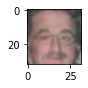

1


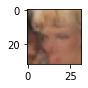

2


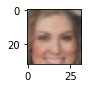

3


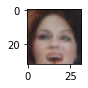

4


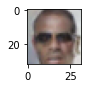

5


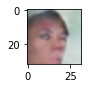

6


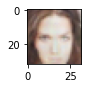

7


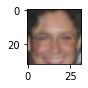

8


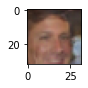

9


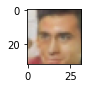

10


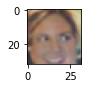

11


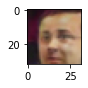

12


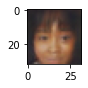

13


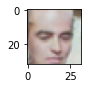

14


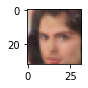

15


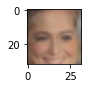

16


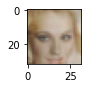

17


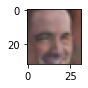

18


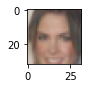

19


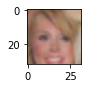

20


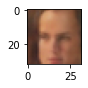

21


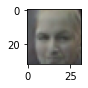

22


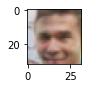

23


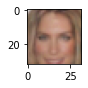

24


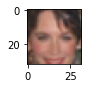

25


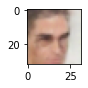

26


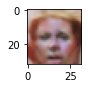

27


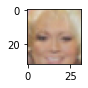

28


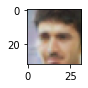

29


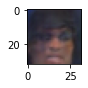

30


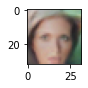

31


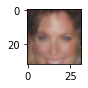

32


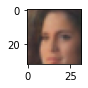

33


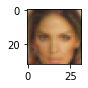

34


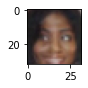

35


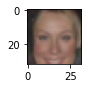

36


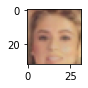

37


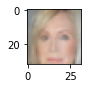

38


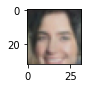

39


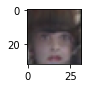

40


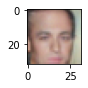

41


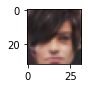

42


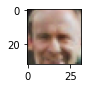

43


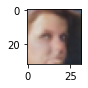

44


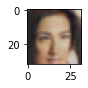

45


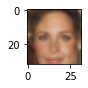

46


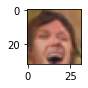

47


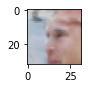

48


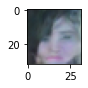

49


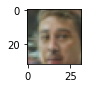

50


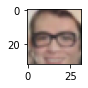

51


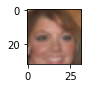

52


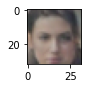

53


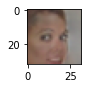

54


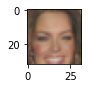

55


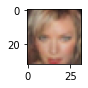

56


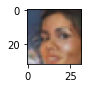

57


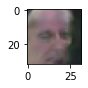

58


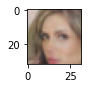

59


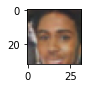

60


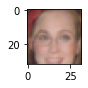

61


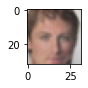

62


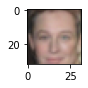

63


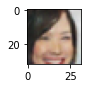

64


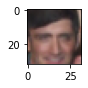

65


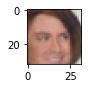

66


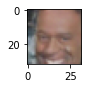

67


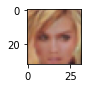

68


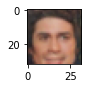

69


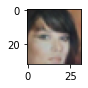

70


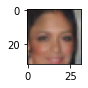

71


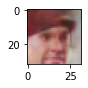

72


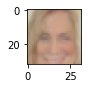

73


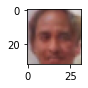

74


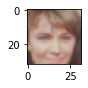

75


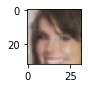

76


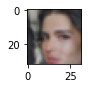

77


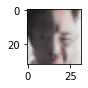

78


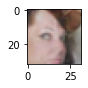

79


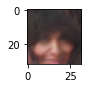

80


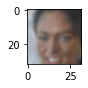

81


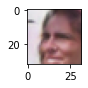

82


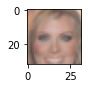

83


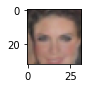

84


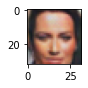

85


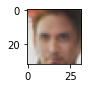

86


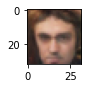

87


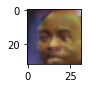

88


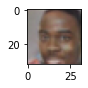

89


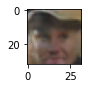

90


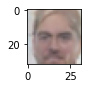

91


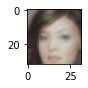

92


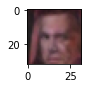

93


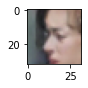

94


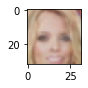

95


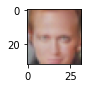

96


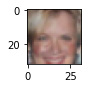

97


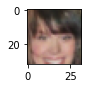

98


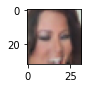

99


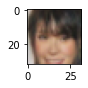

In [ ]:
# We first generate and plot 100 images to identify useful ones.
# The image output is not prettified here with removing axis and whatnot,
# just quick and dirty plotting
noise = torch.randn(100, z_size, 1, 1, device='cuda')
fake = G(noise).detach().cpu()
fake = (fake + 1) / 2
for i in range(len(fake)):
    print(i)
    plt.figure(figsize=(1,1))
    plt.imshow(fake[i].permute(1,2,0))
    plt.show()

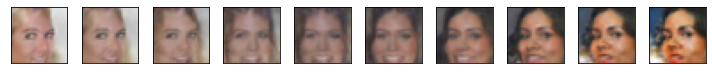

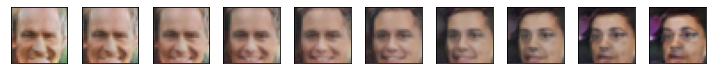

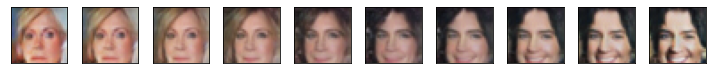

In [ ]:
# plot some interpolated paths
plot_interpoints(noise[53], noise[56], 10)
plot_interpoints(noise[42], noise[11], 10)
plot_interpoints(noise[37], noise[38], 10)

Seems like the transitions are pretty smooth.

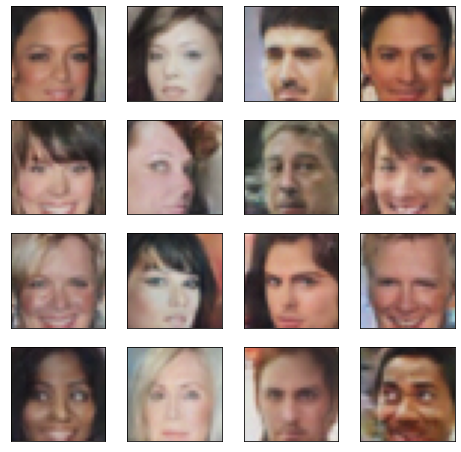

In [ ]:
# perform vector arithmetic with to generate pictures of smiling men
smiling_woman_ind = [70, 97, 96, 34]
neutral_woman_ind = [91, 78, 69, 37]
neutral_man_ind = [28, 49, 14, 85]

plot_diffs(noise, smiling_woman_ind, neutral_woman_ind, neutral_man_ind)

Smiling men are produced!

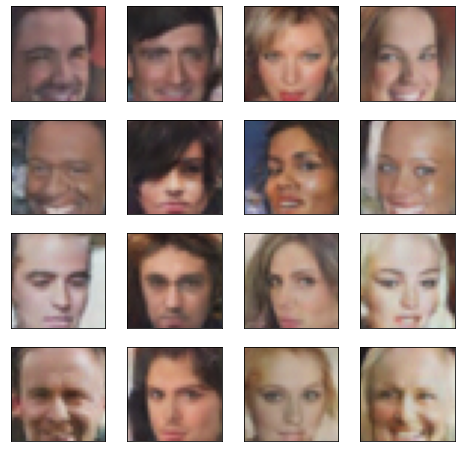

In [ ]:
# perform vector arithmetic with to generate pictures of bald women
bald_man_ind = [17, 66, 13, 42]
male_ind = [64, 41, 86, 14]
woman_ind = [55, 56, 58, 16]
plot_diffs(noise, bald_man_ind, male_ind, woman_ind)

We have created bald women!

0


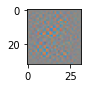

1


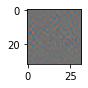

2


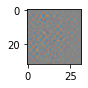

3


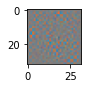

4


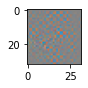

5


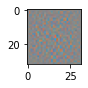

6


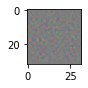

7


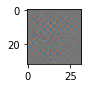

8


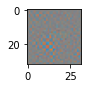

9


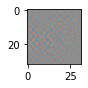

10


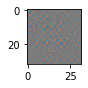

11


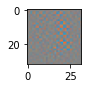

12


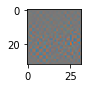

13


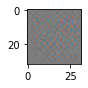

14


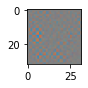

15


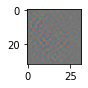

16


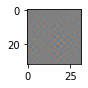

17


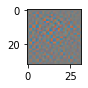

18


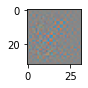

19


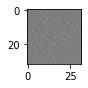

20


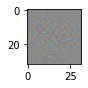

21


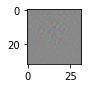

22


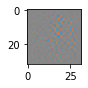

23


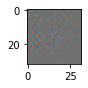

24


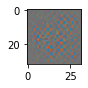

25


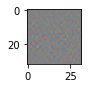

26


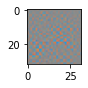

27


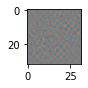

28


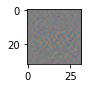

29


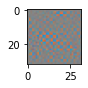

30


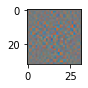

31


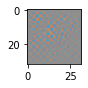

32


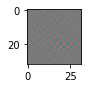

33


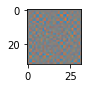

34


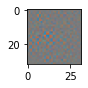

35


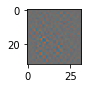

36


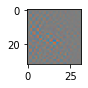

37


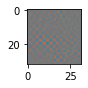

38


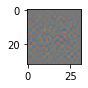

39


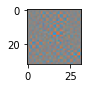

40


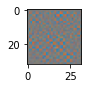

41


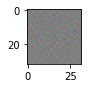

42


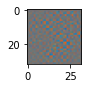

43


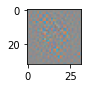

44


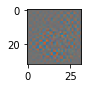

45


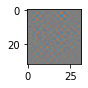

46


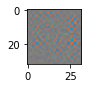

47


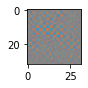

48


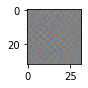

49


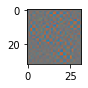

In [ ]:
# visualize first layer filters from the discriminator
# The implementation is adapted
# from https://github.com/kazuto1011/grad-cam-pytorch
class _BaseWrapper(object):
    def __init__(self, model):
        super(_BaseWrapper, self).__init__()
        self.device = next(model.parameters()).device
        self.model = model
        self.handlers = []  # a set of hook function handlers

    def _encode_one_hot(self, ids):
        one_hot = torch.zeros_like(self.logits).to(self.device)
        one_hot.scatter_(1, ids, 1.0)
        return one_hot

    def forward(self, image):
        self.image_shape = image.shape[2:]
        self.logits = self.model(image)
        self.probs = F.softmax(self.logits, dim=1)
        return self.probs.sort(dim=1, descending=True)  # ordered results

    def backward(self, ids):
        """
        Class-specific backpropagation
        """
        one_hot = self._encode_one_hot(ids)
        self.model.zero_grad()
        self.logits.backward(gradient=one_hot, retain_graph=True)

    def generate(self):
        raise NotImplementedError

    def remove_hook(self):
        """
        Remove all the forward/backward hook functions
        """
        for handle in self.handlers:
            handle.remove()


class BackPropagation(_BaseWrapper):
    def forward(self, image):
        self.image = image.requires_grad_()
        return super(BackPropagation, self).forward(self.image)

    def generate(self):
        gradient = self.image.grad.clone()
        self.image.grad.zero_()
        return gradient


class GuidedBackPropagation(BackPropagation):
    """
    "Striving for Simplicity: the All Convolutional Net"
    https://arxiv.org/pdf/1412.6806.pdf
    Look at Figure 1 on page 8.
    """

    def __init__(self, model):
        super(GuidedBackPropagation, self).__init__(model)

        def backward_hook(module, grad_in, grad_out):
            # Cut off negative gradients
            if isinstance(module, nn.ReLU):
                return (F.relu(grad_in[0]),)

        for module in self.model.named_modules():
            self.handlers.append(module[1].register_backward_hook(backward_hook))
test_loader = get_dataloader(50, img_size)
dataiter = iter(test_loader)
images, _ = dataiter.next()
gbp = GuidedBackPropagation(model=D)
_, ids = gbp.forward(images.cuda())
# Guided Backpropagation
gbp.backward(ids=ids[:, [0]])
gradients = gbp.generate()

def showgradient(gradient):
    gradient = gradient.cpu().numpy().transpose(1, 2, 0)
    gradient -= gradient.min()
    gradient /= gradient.max()
    gradient *= 255.0
    plt.figure(figsize=(1, 1))
    plt.imshow(np.uint8(gradient))
    plt.show()
for i, grad in enumerate(gradients):
  print(i)
  showgradient(grad)

Yeah, I don't know what to make of this. I will leave it here anyways...

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "problem_unittests.py" files in your submission.